<a href="https://colab.research.google.com/github/kartrix/Coursera_Capstone/blob/master/Battle_of_Neighbourhoods(NYC_PROPERTY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT THE REQUIRED LIBRARIES FOR DATA ANALYSIS, DATA VISUALIZATION AND MODEL DEVELOPMENT AND EVALUATION**


In [24]:
import math
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim 
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 
from folium import plugins
import matplotlib.pyplot as plt
print('Libraries imported.')

Libraries imported.


**GET THE DATASET**

In [25]:
df = pd.read_csv('/content/drive/My Drive/Datasets/Final_Dataset.csv')

**HAVE A QUICK LOOK OF THE DATA**

In [26]:
df.head()

,Unnamed: 0,NEIGHBORHOOD,LATITUDE,LONGITUDE,TYPE OF HOME,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE,YEAR,BOROUGH
0,0,WAKEFIELD,40.894705,-73.847201,01 ONE FAMILY HOMES,41,158000,316531,335000,505056,2010,BRONX
1,1,WAKEFIELD,40.894705,-73.847201,02 TWO FAMILY HOMES,40,165000,369935,361975,576600,2010,BRONX
2,2,WAKEFIELD,40.894705,-73.847201,03 THREE FAMILY HOMES,7,200000,373190,380000,509000,2010,BRONX
3,3,WAKEFIELD,40.894705,-73.847201,01 ONE FAMILY HOMES,33,186666,300295,320000,475000,2011,BRONX
4,4,WAKEFIELD,40.894705,-73.847201,02 TWO FAMILY HOMES,46,193800,387640,371250,572868,2011,BRONX


In [27]:
df.drop(columns='Unnamed: 0',inplace=True)
df.columns

Index(['NEIGHBORHOOD', 'LATITUDE', 'LONGITUDE', 'TYPE OF HOME',
       'NUMBER OF SALES', 'LOWEST SALE PRICE', 'AVERAGE SALE PRICE',
       'MEDIAN SALE PRICE', 'HIGHEST SALE PRICE', 'YEAR', 'BOROUGH'],
      dtype='object')

In [28]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE,YEAR
count,4156.000000,4156.000000,4156.000000,4.156000e+03,4.156000e+03,4.156000e+03,4.156000e+03,4156.000000
mean,40.685317,-73.934846,40.617661,5.977035e+05,1.028215e+06,9.976406e+05,1.753279e+06,2014.511068
std,0.090001,0.127247,51.399990,1.220038e+06,1.472579e+06,1.420268e+06,2.345922e+06,2.863627
min,40.505334,-74.246569,1.000000,1.500000e+05,1.675000e+05,1.675000e+05,1.767500e+05,2010.000000
25%,40.611009,-74.003116,6.000000,2.100000e+05,4.605418e+05,4.500000e+05,7.200000e+05,2012.000000
50%,40.680540,-73.915654,20.000000,2.700000e+05,6.240040e+05,6.150000e+05,9.950000e+05,2015.000000
75%,40.741378,-73.841612,56.000000,4.600000e+05,9.151912e+05,8.891250e+05,1.750000e+06,2017.000000
max,40.898273,-73.708847,427.000000,2.406500e+07,2.406500e+07,2.406500e+07,4.350000e+07,2019.000000


In [29]:
df['NEIGHBORHOOD'].value_counts()


SUNNYSIDE              114
CHELSEA                 50
MURRAY HILL             44
CANARSIE                30
MARINE PARK             30
SUNSET PARK             30
PARKCHESTER             30
BAYSIDE                 30
CORONA                  30
JACKSON HEIGHTS         30
BENSONHURST             30
WHITESTONE              30
KEW GARDENS             30
BEDFORD STUYVESANT      30
GOWANUS                 30
BAYCHESTER              30
SOUTH OZONE PARK        30
SHEEPSHEAD BAY          30
ELMHURST                30
WOODSIDE                30
CROWN HEIGHTS           30
SOUNDVIEW               30
CARROLL GARDENS         30
GREENPOINT              30
ARVERNE                 30
BAY RIDGE               30
WILLIAMSBRIDGE          30
RICHMOND HILL           30
WAKEFIELD               30
JAMAICA ESTATES         30
BRONXDALE               30
THROGS NECK             30
QUEENS VILLAGE          30
WOODHAVEN               30
ROCKAWAY PARK           30
MASPETH                 30
BRIGHTON BEACH          30
N

In [30]:
df2 = df["BOROUGH"].value_counts().to_frame()
df2.head()

,BOROUGH
QUEENS,1487
BROOKLYN,1140
STATEN ISLAND,886
BRONX,479
MANHATTAN,164


**TO GET NUMBER OF SALES PER BOROUGH**

In [31]:
df1=df.groupby(['BOROUGH'])['NUMBER OF SALES'].sum()
df1.to_frame()
df1.head()
dfp = pd.DataFrame(data=df1)
dfp.head()

,NUMBER OF SALES
BOROUGH,
BRONX,13527
BROOKLYN,49434
MANHATTAN,308
QUEENS,74964
STATEN ISLAND,30574


**VISUALIZING THIS IN A BARCHART FOR BETTER UNDERSTANDING**

Text(0.5, 1.0, 'NUMBER OF HOUSES SALES V/S BOROUGH')

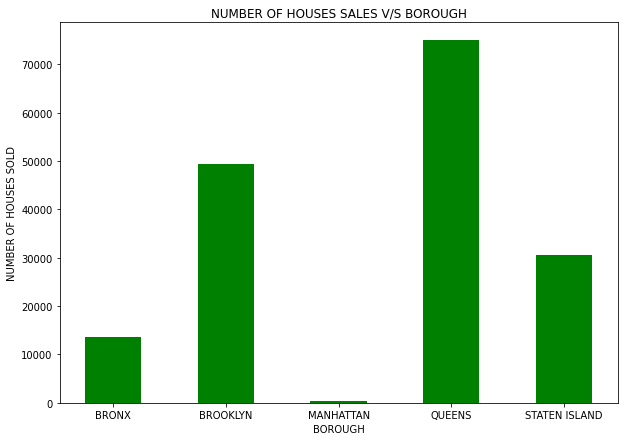

In [32]:
fig = plt.figure(figsize = (10, 7)) 
plt.bar(dfp.index, dfp['NUMBER OF SALES'], color='GREEN', width=0.5)
plt.ylabel('NUMBER OF HOUSES SOLD')
plt.xlabel('BOROUGH')
plt.title('NUMBER OF HOUSES SALES V/S BOROUGH')

**AS WE CAN SEE QUEENS HAS THE HIGHEST NUMBER OF SALES**

In [33]:
 df_n = df[['BOROUGH','NEIGHBORHOOD','LATITUDE','LONGITUDE']]
 
df_n.reset_index(drop=True, inplace=True)

In [34]:
df_n.set_index('BOROUGH', inplace=True)

In [35]:
df_n.head()

,NEIGHBORHOOD,LATITUDE,LONGITUDE
BOROUGH,,,
BRONX,WAKEFIELD,40.894705,-73.847201
BRONX,WAKEFIELD,40.894705,-73.847201
BRONX,WAKEFIELD,40.894705,-73.847201
BRONX,WAKEFIELD,40.894705,-73.847201
BRONX,WAKEFIELD,40.894705,-73.847201


**ANALYSING QUEENS BOROUGH BECAUSE IT HAS MAXIMUM NUMBER OF SALES** 





In [36]:
df_queens =  df_n.loc[["QUEENS"],:].reset_index()
df_queens.head()


,BOROUGH,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,QUEENS,MURRAY HILL,40.764126,-73.812763
1,QUEENS,MURRAY HILL,40.764126,-73.812763
2,QUEENS,MURRAY HILL,40.764126,-73.812763
3,QUEENS,MURRAY HILL,40.764126,-73.812763
4,QUEENS,MURRAY HILL,40.764126,-73.812763


In [37]:
df_queens.shape


(1487, 4)

**JUST 1 BOROUGH MIGHT NOT BE ENOUGH FOR OUR CLUSTERING MODEL , SO LET'S TAKE 3 BOROUGH WITH MAXIMUM NUMBER OF SALES**

In [38]:
df_n2 = df_n.loc[['QUEENS','BROOKLYN','STATEN ISLAND'],:].reset_index()
df_n2.columns = ['BOROUGH', 'NEIGHBORHOOD', 'LATITUDE', 'LONGITUDE']
df_n2.head()


,BOROUGH,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,QUEENS,MURRAY HILL,40.764126,-73.812763
1,QUEENS,MURRAY HILL,40.764126,-73.812763
2,QUEENS,MURRAY HILL,40.764126,-73.812763
3,QUEENS,MURRAY HILL,40.764126,-73.812763
4,QUEENS,MURRAY HILL,40.764126,-73.812763


**SEEMS LIKE THERE ARE A LOT OF DUPLICATE VALUES IN OUR DATASET , SO LET'S CLEAN THEM OUT**

In [62]:
df_n2.drop_duplicates(inplace=True)
df_n2.head()


,Borough,Neighborhood,Latitude,Longitude
0,QUEENS,MURRAY HILL,40.764126,-73.812763
22,QUEENS,ASTORIA,40.768509,-73.915654
52,QUEENS,WOODSIDE,40.746349,-73.901842
82,QUEENS,JACKSON HEIGHTS,40.751981,-73.882821
112,QUEENS,ELMHURST,40.744049,-73.881656


In [40]:

print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_n2['BOROUGH'].unique()),
        df_n2.shape[0]
    )
)

The dataframe has 3 boroughs and 130 neighborhoods.


**GETTING THE GEOGRAPHICAL COORDINATES OF NEW YORK CITY USING THE GEOCODER LIBRARY OF PYTHON**

In [41]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


**PLOTTING THE COORDINATES OF OUR DATASET INTO THE MAP USING THE FOLIUM LIBRARY**

In [42]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_n2['LATITUDE'], df_n2['LONGITUDE'], df_n2['BOROUGH'], df_n2['NEIGHBORHOOD']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**FOURSQUARE CREDENTIALS DECLARATION FOR NEARBY VENUES ANALYSIS**

In [43]:
CLIENT_ID = 'E0ZCAL4OXKXZF2FMLMT0TH2I2BXAFAQUOR4A5LX1DOIUIHX4' # your Foursquare ID
CLIENT_SECRET = '0DLCJOR5IMEILUVRJUUYYYD3I5DVTVSRKDXLLZNLW5IEEEOJ' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: E0ZCAL4OXKXZF2FMLMT0TH2I2BXAFAQUOR4A5LX1DOIUIHX4
CLIENT_SECRET:0DLCJOR5IMEILUVRJUUYYYD3I5DVTVSRKDXLLZNLW5IEEEOJ


**API CALL FUNCTION OF FOURSQUARE WITH URL TO EXPLORE NEARBY VENUES OF OR RESPECTIVE COORDINATES**

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



**GETTING THE NEARBY VENUES INTO THE 'VENUES' VARIABLE**

In [45]:
venues = getNearbyVenues(names=df_n2['NEIGHBORHOOD'],
                                   latitudes=df_n2['LATITUDE'],
                                   longitudes=df_n2['LONGITUDE']
                                  )

MURRAY HILL
ASTORIA
WOODSIDE
JACKSON HEIGHTS
ELMHURST
HOWARD BEACH
CORONA
FOREST HILLS
KEW GARDENS
RICHMOND HILL
LONG ISLAND CITY
SUNNYSIDE
EAST ELMHURST
MASPETH
RIDGEWOOD
GLENDALE
REGO PARK
WOODHAVEN
OZONE PARK
SOUTH OZONE PARK
COLLEGE POINT
WHITESTONE
BAYSIDE
LITTLE NECK
DOUGLASTON
GLEN OAKS
BELLEROSE
FRESH MEADOWS
BRIARWOOD
OAKLAND GARDENS
QUEENS VILLAGE
HOLLIS
SOUTH JAMAICA
ST. ALBANS
SPRINGFIELD GARDENS
CAMBRIA HEIGHTS
ROSEDALE
FAR ROCKAWAY
BROAD CHANNEL
BREEZY POINT
BEECHHURST
ARVERNE
NEPONSIT
FLORAL PARK
HOLLISWOOD
JAMAICA ESTATES
HILLCREST
LAURELTON
BELLE HARBOR
ROCKAWAY PARK
JAMAICA HILLS
MIDDLE VILLAGE
HAMMELS
BAY RIDGE
BENSONHURST
SUNSET PARK
GREENPOINT
GRAVESEND
BRIGHTON BEACH
SHEEPSHEAD BAY
CROWN HEIGHTS
KENSINGTON
WINDSOR TERRACE
PROSPECT HEIGHTS
BROWNSVILLE
BUSHWICK
BEDFORD STUYVESANT
BROOKLYN HEIGHTS
COBBLE HILL
CARROLL GARDENS
RED HOOK
GOWANUS
FORT GREENE
PARK SLOPE
CYPRESS HILLS
EAST NEW YORK
CANARSIE
FLATLANDS
MANHATTAN BEACH
CONEY ISLAND
BATH BEACH
BOROUGH PARK
DYKE

**HAVING A QUICK LOOK AT NEARBY VENUES DATAFRAME**

In [46]:
venues.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MURRAY HILL,40.764126,-73.812763,Hahm Ji Bach - 함지박,40.763022,-73.815042,Korean Restaurant
1,MURRAY HILL,40.764126,-73.812763,Coffee Factory,40.763125,-73.814341,Coffee Shop
2,MURRAY HILL,40.764126,-73.812763,Mapo BBQ,40.762309,-73.814880,Korean Restaurant
3,MURRAY HILL,40.764126,-73.812763,Kum Sung Chik Naengmyun,40.763122,-73.815091,Korean Restaurant
4,MURRAY HILL,40.764126,-73.812763,Northern Sushi,40.764717,-73.811235,Japanese Restaurant


In [47]:
venues['Neighborhood'].value_counts()


ASTORIA                100
BROOKLYN HEIGHTS       100
CARROLL GARDENS        100
GREENPOINT              98
CLINTON HILL            98
COBBLE HILL             95
BOERUM HILL             88
BAY RIDGE               83
JACKSON HEIGHTS         78
BAYSIDE                 77
WOODSIDE                75
PROSPECT HEIGHTS        74
BUSHWICK                72
LONG ISLAND CITY        70
FORT GREENE             63
PARK SLOPE              63
GOWANUS                 61
SUNNYSIDE               51
RED HOOK                50
LITTLE NECK             50
MURRAY HILL             48
BATH BEACH              47
COLLEGE POINT           45
KEW GARDENS             45
BULLS HEAD              45
BRIGHTON BEACH          44
RIDGEWOOD               43
REGO PARK               40
FOREST HILLS            38
ELTINGVILLE             38
HOWARD BEACH            38
SUNSET PARK             37
KENSINGTON              36
OZONE PARK              35
FAR ROCKAWAY            33
MILL BASIN              32
OCEAN HILL              31
M

In [48]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))


There are 324 uniques categories.


**LET'S DO ONE HOT ENCODING TO GET DUMMIES**

In [49]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Yoga Studio,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Post Office,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Romanian Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant

**GROUPING THEM BY NEIGHBORHOOD**

In [50]:

venues_grouped = onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped

,Neighborhood,Yoga Studio,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Post Office,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Romanian Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**GETTING 10 MOST COMMON VENUES FROM THE ABOVE DATA**




In [52]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANNADALE,Pizza Place,Liquor Store,Sports Bar,Dance Studio,Food,Diner,Restaurant,Train Station,Fast Food Restaurant,Ethiopian Restaurant
1,ARDEN HEIGHTS,Pharmacy,Coffee Shop,Pizza Place,Bus Stop,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market
2,ARROCHAR,Bus Stop,Pizza Place,Deli / Bodega,Bagel Shop,Italian Restaurant,Polish Restaurant,Athletics & Sports,Middle Eastern Restaurant,Supermarket,Mediterranean Restaurant
3,ARVERNE,Surf Spot,Sandwich Place,Metro Station,Board Shop,Thai Restaurant,Bed & Breakfast,Restaurant,Donut Shop,Café,Coffee Shop
4,ASTORIA,Bar,Middle Eastern Restaurant,Hookah Bar,Greek Restaurant,Indian Restaurant,Seafood Restaurant,Deli / Bodega,Mediterranean Restaurant,Café,Pizza Place


**APPLIING K MEANS MODEL**

In [53]:
check_df = venues_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(check_df)
    distortions.append(kmeanModel.inertia_)

**FINDING THE OPTIMAL K VALUE BY PLOTTING K V/S DISTORTION GRAPH(ELBOW METHOD)**

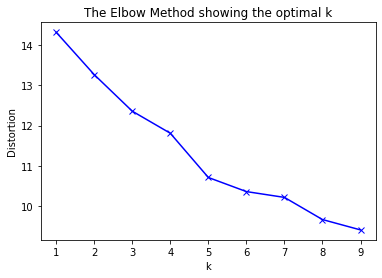

In [54]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**CLUSTERING THE DATA WITH K = 5**

In [55]:
kclusters = 5

grouped_clustering = venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [56]:
df_n2.columns = ["Borough", "Neighborhood", "Latitude", "Longitude"]



**ADDING COORDINATES TO OUR DATA**

In [63]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df_n2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood',drop=True), on='Neighborhood')

df_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,QUEENS,MURRAY HILL,40.764126,-73.812763,1,Korean Restaurant,Supermarket,Coffee Shop,Bar,Bank,Deli / Bodega,Pizza Place,Bath House,Fish & Chips Shop,Breakfast Spot
22,QUEENS,ASTORIA,40.768509,-73.915654,1,Bar,Middle Eastern Restaurant,Hookah Bar,Greek Restaurant,Indian Restaurant,Seafood Restaurant,Deli / Bodega,Mediterranean Restaurant,Café,Pizza Place
52,QUEENS,WOODSIDE,40.746349,-73.901842,1,Grocery Store,Thai Restaurant,Bakery,Filipino Restaurant,Latin American Restaurant,Donut Shop,American Restaurant,Pub,Pizza Place,Bar
82,QUEENS,JACKSON HEIGHTS,40.751981,-73.882821,1,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Thai Restaurant,Mexican Restaurant,Mobile Phone Shop,Empanada Restaurant,Spanish Restaurant,Shoe Store
112,QUEENS,ELMHURST,40.744049,-73.881656,1,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Colombian Restaurant,Snack Place,Malay Restaurant,Sushi Restaurant,Salon / Barbershop


**MAPPING THE CLUSTERS USING FOLIUM**

In [64]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**1ST CLUSTER**

In [65]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
588,SOUTH OZONE PARK,Park,Deli / Bodega,Bar,Donut Shop,Food,Fast Food Restaurant,Sandwich Place,Food Truck,Hotel,Dessert Shop
648,WHITESTONE,Boxing Gym,Dance Studio,Deli / Bodega,Bubble Tea Shop,Candy Store,Women's Store,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market
1260,JAMAICA ESTATES,Bus Station,Intersection,Plaza,Fish & Chips Shop,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1314,LAURELTON,Cosmetics Shop,Caribbean Restaurant,Train Station,Park,Sculpture Garden,Deli / Bodega,Cuban Restaurant,Ethiopian Restaurant,Event Service,Event Space
2141,EAST NEW YORK,Deli / Bodega,Bus Station,Spanish Restaurant,Event Service,Fast Food Restaurant,Asian Restaurant,Music Venue,Caribbean Restaurant,Fried Chicken Joint,Pizza Place
2344,DYKER HEIGHTS,Cosmetics Shop,Bagel Shop,Burger Joint,Golf Course,Filipino Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market
2485,OCEAN HILL,Deli / Bodega,Bus Stop,Grocery Store,Fried Chicken Joint,Southern / Soul Food Restaurant,Supermarket,Metro Station,Mexican Restaurant,Playground,Food
2627,CHELSEA,Bus Stop,Steakhouse,Spanish Restaurant,Sandwich Place,Italian Restaurant,Park,Fast Food Restaurant,Ethiopian Restaurant,Event Service,Event Space
2709,NEW BRIGHTON,Bus Stop,Deli / Bodega,Park,Laundromat,Playground,Discount Store,Filipino Restaurant,Event Service,Event Space,Falafel Restaurant
2796,GRYMES HILL,Bus Stop,Deli / Bodega,American Restaurant,Dog Run,Fish Market,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


**2ND CLUSTER**

In [66]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MURRAY HILL,Korean Restaurant,Supermarket,Coffee Shop,Bar,Bank,Deli / Bodega,Pizza Place,Bath House,Fish & Chips Shop,Breakfast Spot
22,ASTORIA,Bar,Middle Eastern Restaurant,Hookah Bar,Greek Restaurant,Indian Restaurant,Seafood Restaurant,Deli / Bodega,Mediterranean Restaurant,Café,Pizza Place
52,WOODSIDE,Grocery Store,Thai Restaurant,Bakery,Filipino Restaurant,Latin American Restaurant,Donut Shop,American Restaurant,Pub,Pizza Place,Bar
82,JACKSON HEIGHTS,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Thai Restaurant,Mexican Restaurant,Mobile Phone Shop,Empanada Restaurant,Spanish Restaurant,Shoe Store
112,ELMHURST,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Colombian Restaurant,Snack Place,Malay Restaurant,Sushi Restaurant,Salon / Barbershop
142,HOWARD BEACH,Pharmacy,Bagel Shop,Italian Restaurant,Sandwich Place,Fast Food Restaurant,Deli / Bodega,Donut Shop,Clothing Store,Chinese Restaurant,Diner
172,CORONA,Mexican Restaurant,Sandwich Place,Supermarket,Bakery,Italian Restaurant,South American Restaurant,Empanada Restaurant,Basketball Court,Chinese Restaurant,Donut Shop
202,FOREST HILLS,Gym,Gym / Fitness Center,Convenience Store,Thai Restaurant,Park,Yoga Studio,Pizza Place,Pharmacy,Snack Place,Bagel Shop
231,KEW GARDENS,Chinese Restaurant,Bank,Pizza Place,Indian Restaurant,Cosmetics Shop,Bar,Sandwich Place,Gourmet Shop,Juice Bar,Donut Shop
261,RICHMOND HILL,Latin American Restaurant,Pizza Place,Lounge,Bank,Gym / Fitness Center,Bus Station,Moving Target,Supermarket,Caribbean Restaurant,Sandwich Place


**3RD CLUSTER**

In [67]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1138,BREEZY POINT,Beach,Monument / Landmark,Trail,Women's Store,Filipino Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market
1195,NEPONSIT,Beach,Beach Bar,Women's Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
1457,HAMMELS,Beach,Fried Chicken Joint,Diner,Bus Station,Bus Stop,Fast Food Restaurant,Shoe Store,Dog Run,Gym / Fitness Center,Food Truck
2827,SOUTH BEACH,Beach,Pier,Deli / Bodega,Athletics & Sports,Women's Store,Fish & Chips Shop,Event Space,Falafel Restaurant,Farm,Farmers Market


**4TH CLUSTER**

In [68]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2817,TODT HILL,Park,Women's Store,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


**5TH CLUSTER**

In [69]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2881,PORT IVORY,Bus Station,Women's Store,Filipino Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
